# Importing & Reading data

Ce premier notebook vous propose de charger tous les datasets et d'afficher quelques images

In [1]:
import numpy as np
import skimage.exposure
from matplotlib import pyplot as plt

In [2]:
TRAIN_DATA_URL = "https://storage.googleapis.com/fchouteau-isae-deep-learning/hackathon-2020/eurosat_train.npz"
UNSUP_DATA_URL = "https://storage.googleapis.com/fchouteau-isae-deep-learning/hackathon-2020/eurosat_unsup.npz"

BIGEARTHNET_URL = "https://storage.googleapis.com/fchouteau-isae-deep-learning/hackathon-2020/bigearthnet_rgb.npz"

CLASSES = [
    'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
    'River', 'SeaLake'
]

In [3]:
DATASOURCE = np.DataSource(None)

In [4]:
def plot_imgs(x, y=None, grid_size=4, title="samples"):
    """
    Plot grid_size*grid_size images 
    """
    fig, ax = plt.subplots(grid_size, grid_size, figsize=(20, 20))
    fig.tight_layout()
    idxs = np.random.randint(len(x), size=16)

    for i in range(grid_size ** 2):
        k = idxs[i]
        if y is not None:
            img, lbl = x[k], CLASSES[y[k]]
        else:
            img, lbl = x[k], "unlabelled"
        img = skimage.exposure.adjust_gamma(img, gamma=0.7)
        ax[i % 4][i // 4].imshow(img)
        ax[i % 4][i // 4].set_title(lbl)
        ax[i % 4][i // 4].axis('off')
    fig.suptitle(title, fontsize=14)
    plt.show()

# Train Dataset

Le jeu d'entraînement est composé de 500 images 64x64x3 dans un tableau numpy.
Ces images sont réparties uniformément sur 10 classes

In [5]:
train_dataset = DATASOURCE.open(TRAIN_DATA_URL, mode="rb")

In [6]:
train_dataset = np.load(train_dataset)

In [7]:
x_train, y_train = train_dataset['x'], train_dataset['y']

In [8]:
print(x_train.shape, x_train.dtype, y_train.shape)

(500, 64, 64, 3) uint8 (500,)


In [9]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50]))


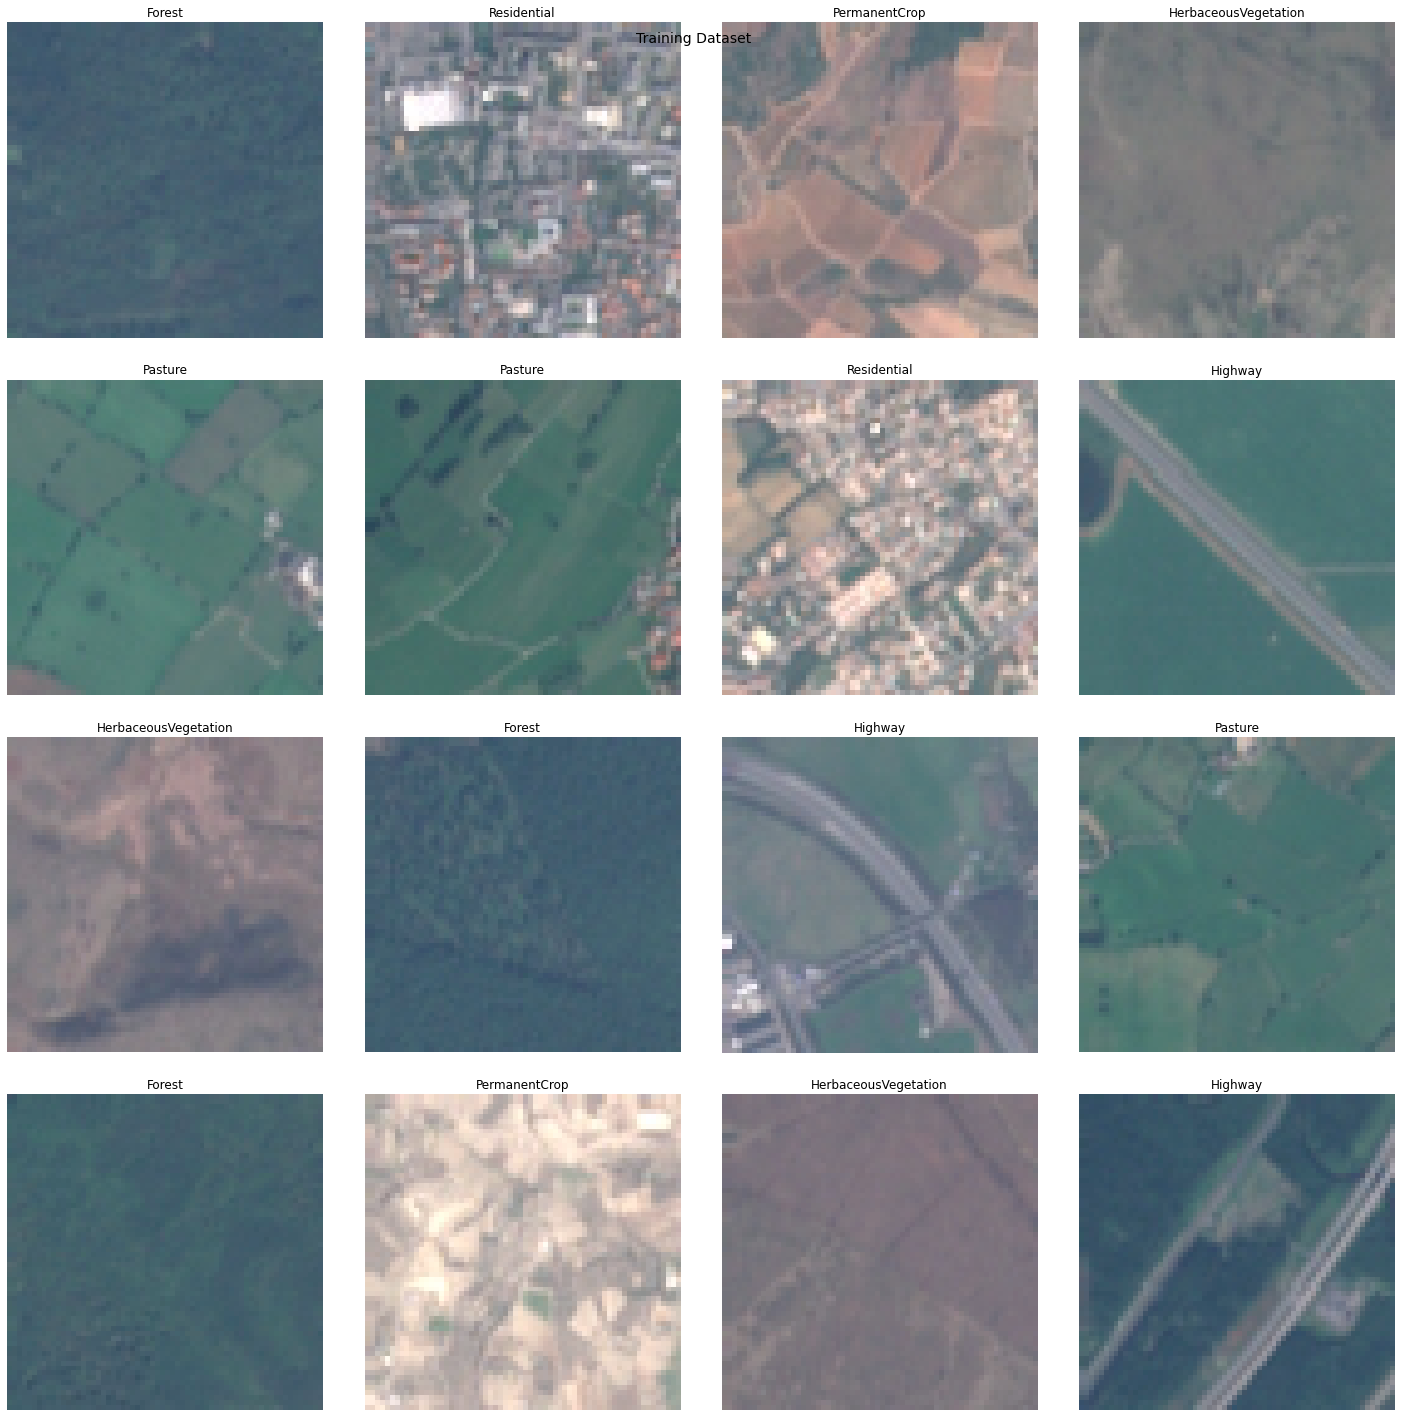

In [10]:
plot_imgs(x_train, y=y_train, title="Training Dataset")

# Unsup Dataset

Le jeu d'entraînement non supervisé est composé de 5000 images 64x64x3 dans un tableau numpy.
Ces images ne sont pas labellisées et doivent être utilisées en complément du jeu de train pour améliorer les résultats

In [11]:
unsup_dataset = DATASOURCE.open(UNSUP_DATA_URL, mode="rb")

In [12]:
unsup_dataset = np.load(unsup_dataset)

In [13]:
x_unsup = unsup_dataset['x']

In [14]:
print(x_train.shape, x_train.dtype)

(500, 64, 64, 3) uint8


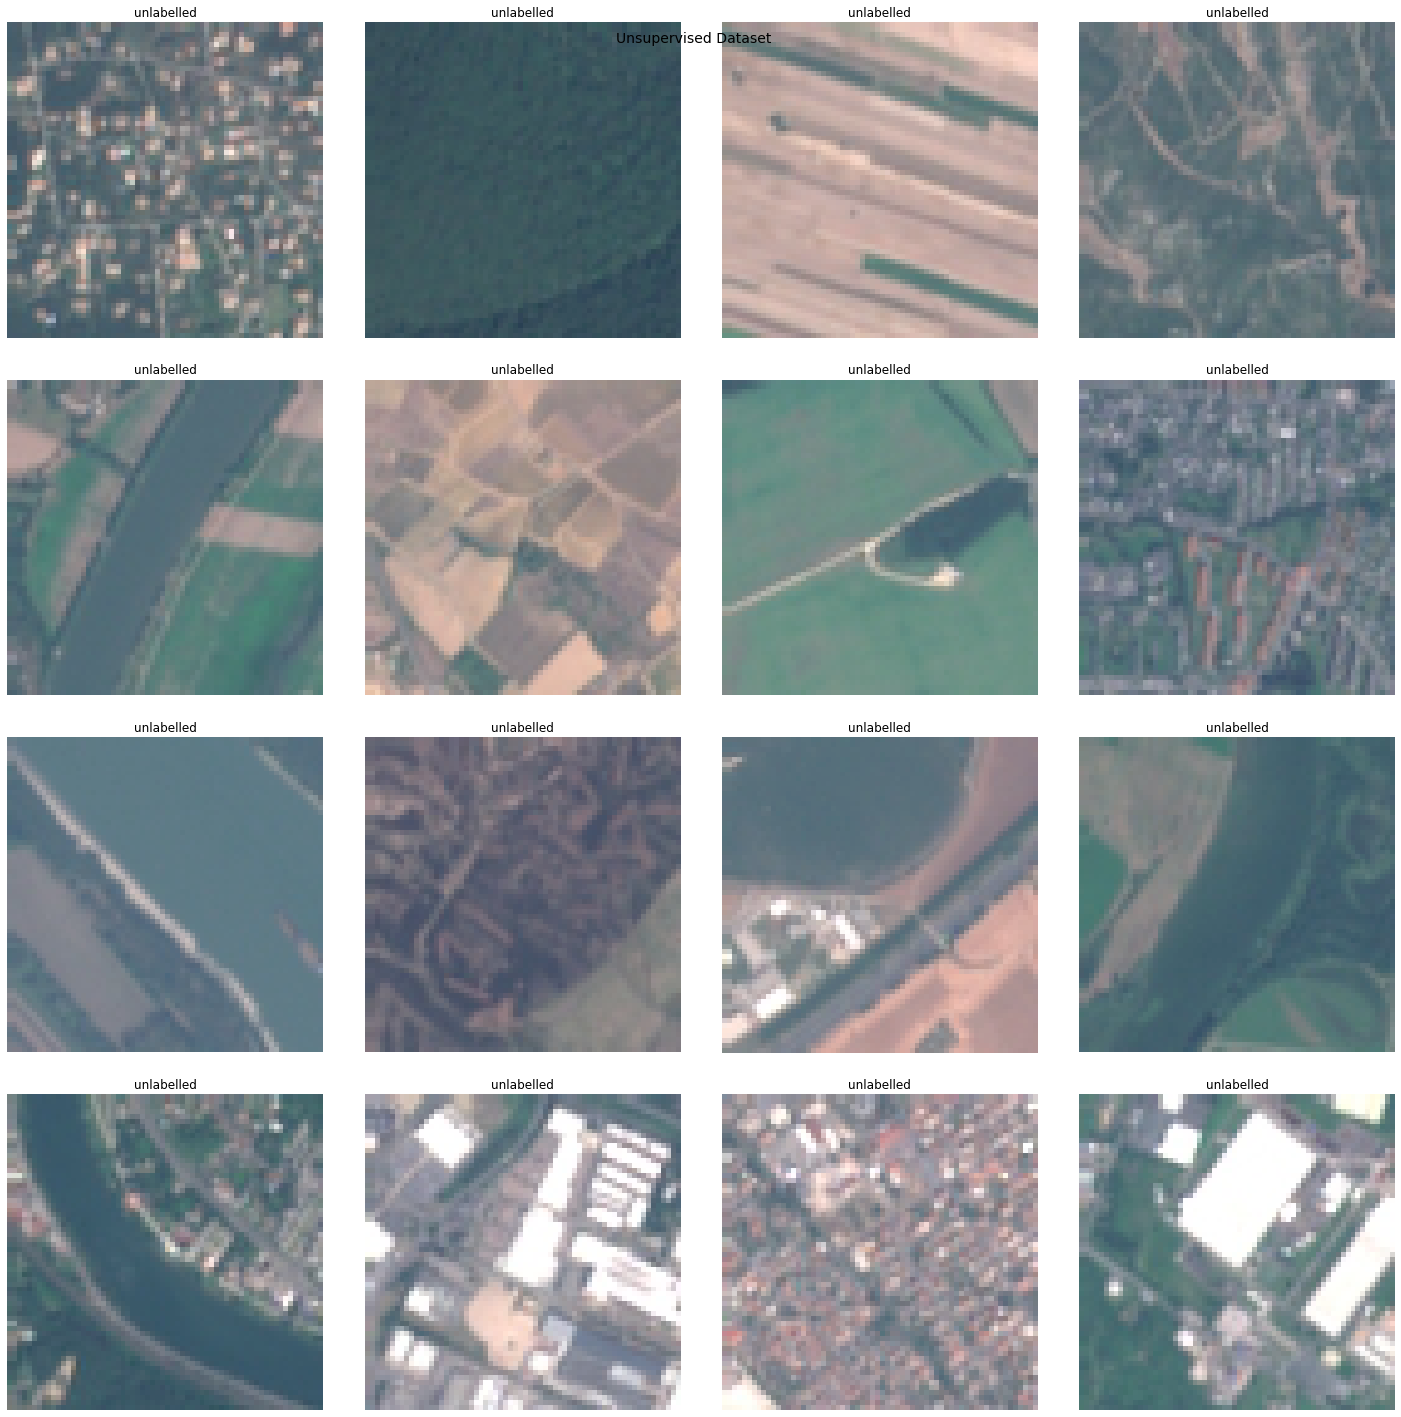

In [15]:
plot_imgs(x_train, y=None, title="Unsupervised Dataset")

# BigEarthNet Dataset

Le jeu d'entraînement non supervisé bigearthnet est composé de 95000 images 64x64x3 dans un tableau numpy.
Ces images ne sont pas labellisées et doivent être utilisées en complément du jeu de train pour améliorer les résultats
Ces images proviennent du même satellite que les deux jeux précédents mais les traitements sont légèremment différents
Par contre ces images sont beaucoup plus variées et peuvent donc être utilisées en complément final pour gagner les quelques % !

In [16]:
bigben_dataset = DATASOURCE.open(BIGEARTHNET_URL, mode="rb")

In [17]:
bigben_dataset = np.load(bigben_dataset)

In [18]:
x_bigearthnet = bigben_dataset['x']

In [19]:
print(x_bigearthnet.shape, x_bigearthnet.dtype)

(95000, 64, 64, 3) uint8


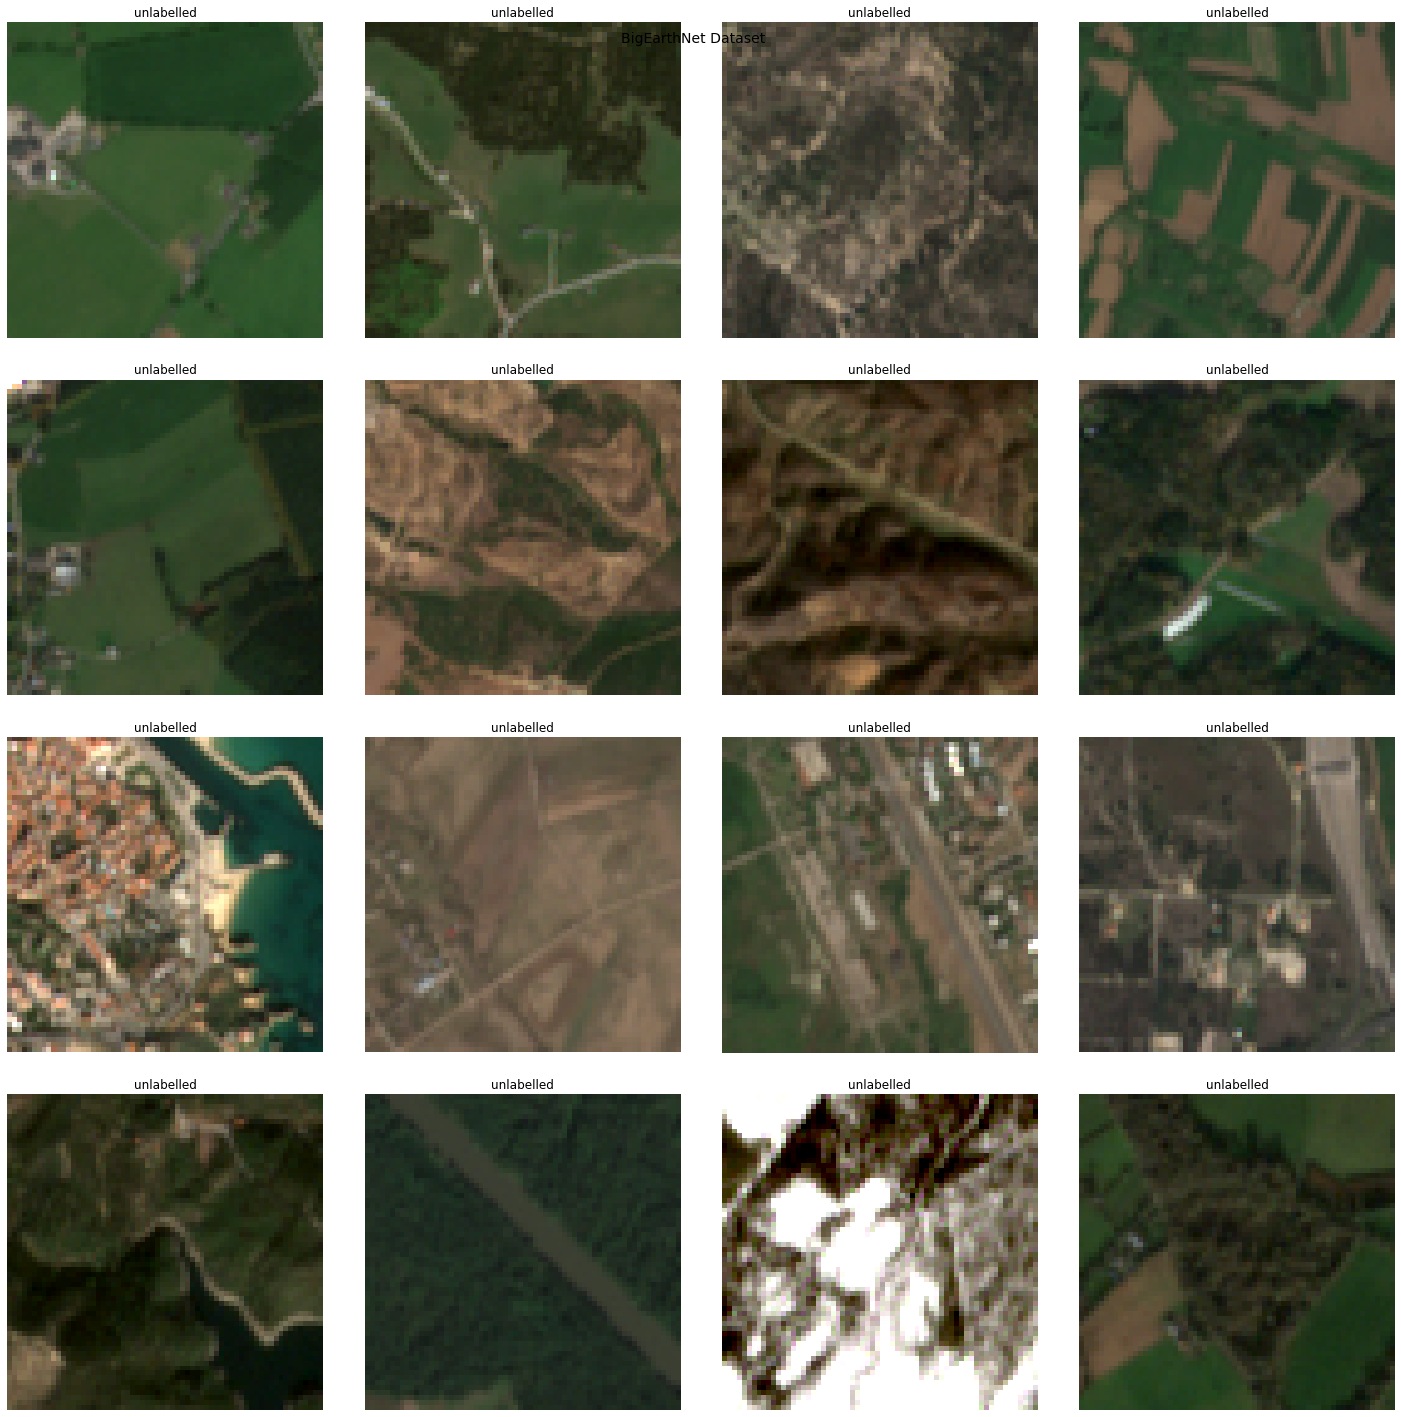

In [20]:
plot_imgs(x_bigearthnet, y=None, title="BigEarthNet Dataset")